# Lista III de Descritiva #

Q2 - A planilha ”dadosmalariaCEA15P14.csv”contém dados de uma investigação sobre a incidência da malária durante a gravidez e os efeitos da infecção na mãe e no recém-nascido. O estudo foi realizado nos municı́pios de Cruzeiro do Sul, Mâncio Lima, Rodrigues Alves, Porto Walter e Marechal Thaumaturgo, no estado do Acre. Ao todo, 600 mulheres − não infectadas, infectadas com o parasita Plasmodium vivax, com o Plasmodium falciparum ou com ambos − fora acompanhadas durante a gestação e tiveram informações sobre o desfecho gestacional e sobre o recém-nascido registradas. Utilize os dados para responder às seguintes questões:

In [131]:
library(ggplot2)
library(gtable)
library(grid)
library(extrafont)

Registering fonts with R


(a) Determine os diagramas de dispersão e os coeficientes de correlação
entre Perimetro Cefálico × Peso e Perimetro Cefálico × Estatura.

In [1]:
# Lendo o dataset

malaria <- read.csv('dadosmalariaCEA15P14.csv', sep = ';', stringsAsFactors = FALSE)

In [26]:
library(ggplot2)

In [2]:
# Vamos dar uma olhada nas primeiras 3 linhas do dataframe
head(malaria, 3)

id,grupo,data,datnasc,idade,natural,bairro,cidade,profissa,estciv,⋯,max_paramal,trim_mal1,trim_mal2,trim_mal3,trim_mal4,trim_mal5,trimestres,trim_grupo,qtmal_grav,peso_plac_menor
1,3,05/12/2012,12/04/1993,19,CRUZEIRO DO SUL,SAO JOSE,CRUZEIRO DO SUL,DO LAR,1,⋯,4,2,2,0,0,0,22000,2,2,1
2,1,07/12/2012,03/09/1994,18,GUAJARA,,GUAJARA,DO LAR,1,⋯,4,2,2,0,0,0,22000,2,2,0
3,2,14/12/2012,18/05/1992,20,CRUZEIRO DO SUL,VILA SAO PEDRO,CRUZEIRO DO SUL,DO LAR,3,⋯,2,2,2,0,0,0,22000,2,2,0


In [3]:
# O coeficiente de correlação entre Perimetro Cefálico e Peso
cor(malaria$peso, malaria$pc)

ERROR: Error in cor(malaria$peso, malaria$pc): 'y' must be numeric


In [4]:
malaria$pc <- as.numeric(malaria$pc)

Warning message in eval(expr, envir, enclos):
“NAs introduzidos por coerção”

In [5]:
library(zoo) # para usar a função na.aggregate() que substitui os valores nulos pela média da coluna pc
malaria$pc <- na.aggregate(malaria$pc)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [6]:
malaria$peso <- na.aggregate(malaria$peso)

In [7]:
# Vamos tentar obter novamente o coeficiente de correlação entre Perimetro Cefálico e Peso
cor(malaria$pc, malaria$peso)

[1] 0.6579632

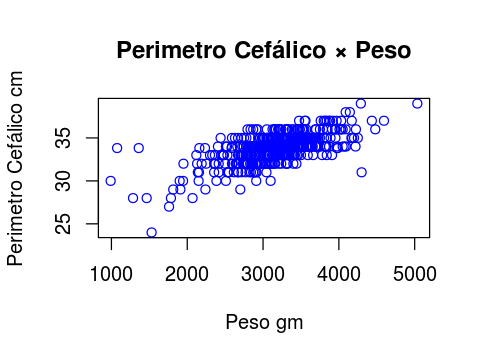

In [8]:
options(repr.plot.width=4, repr.plot.height=3)

plot(malaria$peso, malaria$pc, 
        main = 'Perimetro Cefálico × Peso',
        xlab = 'Peso gm', ylab = 'Perimetro Cefálico cm',
        col = 'blue')

#abline(lm(malaria$pc ~ malaria$peso), col="red") # regression line (y~x)

In [9]:
# Vamos ver agora Cefálico × Estatura

cor(malaria$est, malaria$pc)

ERROR: Error in cor(malaria$est, malaria$pc): 'x' must be numeric


In [10]:
# Vamos mudar para númerico e substituir os valores nulos pela média da coluna
malaria$est <- as.numeric(malaria$est)
malaria$est <- na.aggregate(malaria$est)

Warning message in eval(expr, envir, enclos):
“NAs introduzidos por coerção”

In [11]:
cor(malaria$est, malaria$pc)

[1] 0.5543555

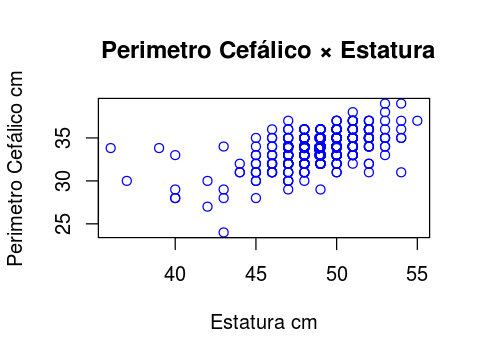

In [12]:
plot(malaria$est, malaria$pc, 
        main = ' Perimetro Cefálico × Estatura',
        xlab = 'Estatura cm', ylab = 'Perimetro Cefálico cm',
        col = 'blue')

(b) Escolha a variável com maior correlação e determine a reta de re-
gressão. Para um recém-nascido com peso de 3000 g e estatura de 50 cm ,
qual o valor predito de Perimetro Cefálico?

In [13]:
# Modelo para o Perimetro Cefálico × Peso
modelo1 <- lm(malaria$pc ~ malaria$peso)

In [16]:
# Para saber a fórmula para prever o pc para um peso de 3000 g
# vamos ver qual o intercepto e o coeficinte de inclinação

modelo1


Call:
lm(formula = malaria$pc ~ malaria$peso)

Coefficients:
 (Intercept)  malaria$peso  
   26.854064      0.002199  


In [17]:
# y = a + bx
a <- 26.854064
b <- 0.002199

y = a + b*3000

# O modelo estima que o 
# perímeto Cefálico para 
# um recem nascido com 3000 g é
y

[1] 33.45106

In [18]:
# Modelo para Perimetro Cefálico × Estatura
modelo2 <- lm(malaria$pc ~ malaria$est)

In [21]:
modelo2


Call:
lm(formula = malaria$pc ~ malaria$est)

Coefficients:
(Intercept)  malaria$est  
    12.9993       0.4257  


In [22]:
# y = a + bx
a <- 12.9993
b <- 0.4257

y = a + b*50

# O modelo estima que o 
# perímeto Cefálico para
# um bebê com estatura de 50 cm é
y

[1] 34.2843

(c) Vamos separar os recém-nascidos em dois grupos conforme a condição da sua mãe: Não infectada (Controle) e Infectada com algum tipo de parasita (Malária). Determine o diagrama de dispersão para Perimetro Cefálico × Peso , diferenciando os pontos conforme o grupo que pertence o recém-nascido.

In [35]:
# criando as variáveis dummy
malaria['GRUPO'] <- ifelse(malaria$grupo != 0, 'malaria', 'controle')

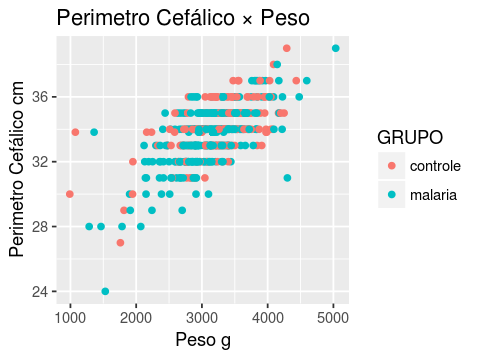

In [39]:
ggplot(data = malaria) + 
  geom_point(mapping = aes(x = peso, y = pc, color = GRUPO)) +
  labs(x = 'Peso g', y = 'Perimetro Cefálico cm', title = 'Perimetro Cefálico × Peso')

(d) Ajuste um modelo de regressão considerando como variável resposta o Perimetro Cefálico e as variáveis explicativas associadas a mãe: Grupo (0=Controle ; 1=Malária) e Idade (0=até 35 anos; 1=mais de 35 anos).
Interprete os parâmetros desse modelo. Obtenha a estimativa do desvio padrão dos erros e faça uma análise de resı́duos para o modelo.

In [40]:
# criando as variáveis dummy
malaria['grupo_dummy'] <- ifelse(malaria$grupo != 0, 1, 0)
malaria['idade_dummy'] <- ifelse(malaria$idade < 35, 0, 1)

In [41]:
modelo3 <- lm(malaria$pc ~ malaria$grupo_dummy + malaria$idade_dummy)

In [42]:
modelo3


Call:
lm(formula = malaria$pc ~ malaria$grupo_dummy + malaria$idade_dummy)

Coefficients:
        (Intercept)  malaria$grupo_dummy  malaria$idade_dummy  
            34.0736              -0.4165               0.2625  


In [44]:
summary(modelo3)


Call:
lm(formula = malaria$pc ~ malaria$grupo_dummy + malaria$idade_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6571 -0.6571  0.1644  0.9264  5.3429 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          34.0736     0.1095 311.217  < 2e-16 ***
malaria$grupo_dummy  -0.4165     0.1357  -3.070  0.00224 ** 
malaria$idade_dummy   0.2625     0.2856   0.919  0.35843    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.595 on 597 degrees of freedom
Multiple R-squared:  0.01679,	Adjusted R-squared:  0.0135 
F-statistic: 5.098 on 2 and 597 DF,  p-value: 0.006375


In [46]:
residuos <- resid(modelo3)

In [59]:
sum(residuos)

[1] 3.885781e-15

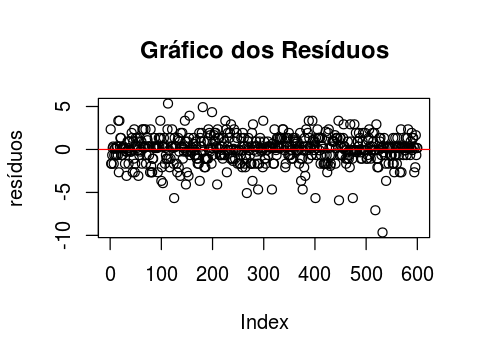

In [58]:
plot(residuos, ylab='resíduos', main='Gráfico dos Resíduos')
abline(0, 0, col='red')

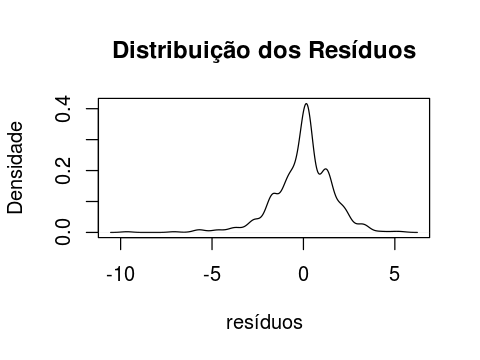

In [49]:
plot(density(residuos), xlab = 'resíduos', ylab = 'Densidade',
    main = 'Distribuição dos Resíduos')

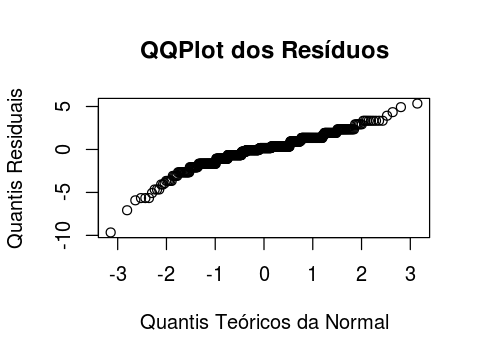

In [52]:
qqnorm(residuos, xlab='Quantis Teóricos da Normal', 
      ylab = 'Quantis Residuais', main='QQPlot dos Resíduos')

Questão 1 - Na tabela a seguir apresentamos 20 observações sobre a Colheita (em
milhares de hectolitros) e o Preço (escudos/litro) de uma determinada vari-
edade de vinho tinto em Portugal, durante o perı́odo de 1942 a 1961.

<img src='tabela1.png'>

In [62]:
ano <- c(1942:1961)
colheita <- c(6409, 19835, 10939, 7826, 7165, 7807, 6028, 6037, 6458, 6981,
             4233, 8790, 8959, 8289, 7910, 6775, 6088, 6381, 8600, 4805)
preco <- c(2.26, 1.64, 1.52, 2.29, 3.54, 2.09, 2.46, 2.5, 2.62, 2.57, 3.38,
          2.02, 1.68, 1.78, 1.99, 3.02, 3.23, 2.98, 2.74, 3.38)

In [63]:
df <- data.frame(ano, colheita, preco)

In [64]:
head(df, 3)

ano,colheita,preco
1942,6409,2.26
1943,19835,1.64
1944,10939,1.52


(a) Faça o diagrama de dispersão para Preço × Colheita, determine o
coeficiente de correlação linear e interprete.

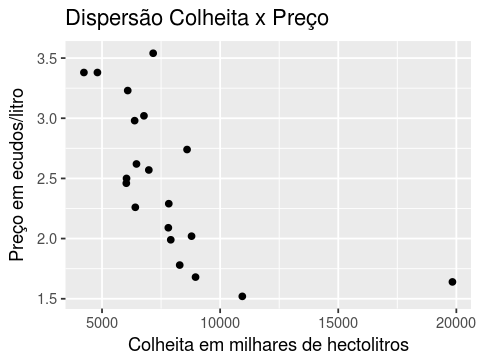

In [68]:
ggplot(df) + 
  geom_point(aes(x = colheita, y = preco)) +
  labs(x = 'Colheita em milhares de hectolitros', y = 'Preço em ecudos/litro', 
       title = 'Dispersão Colheita x Preço')

In [69]:
# Coeficiente de correlação de Pearson
cor(df$colheita, df$preco)

[1] -0.6239457

(b) Obtenha a reta de regressão, adicione a reta ao diagrama de dispersão
e interprete o valor obtido para o coeficiênte angular (”‘b”’). Considere o
Preço como a variável resposta.

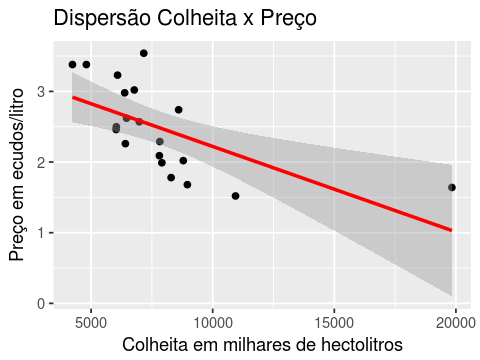

In [75]:
ggplot(df, aes(x = colheita, y = preco)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(x = 'Colheita em milhares de hectolitros', y = 'Preço em ecudos/litro', 
       title = 'Dispersão Colheita x Preço')

In [76]:
modelo_colheita <- lm(df$preco ~ df$colheita) 
modelo_colheita


Call:
lm(formula = df$preco ~ df$colheita)

Coefficients:
(Intercept)  df$colheita  
  3.4297758   -0.0001209  


(c) Faça um gráfico de resı́duos considerando no eixo horizontal a variável
explicativa (Colheita). Comente.

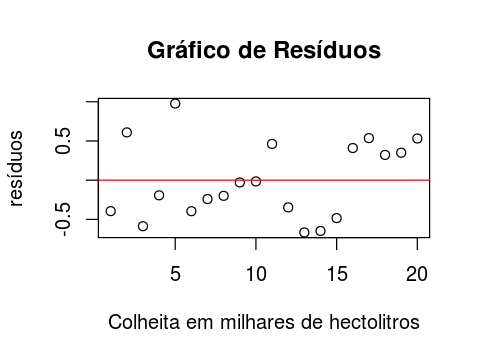

In [86]:
residuos_colheita <- resid(modelo_colheita)
plot(residuos_colheita, 
     xlab='Colheita em milhares de hectolitros',
     ylab='resíduos', main='Gráfico de Resíduos')
abline(0, 0, col='red')

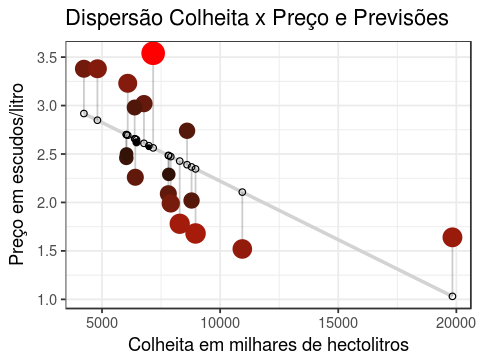

In [85]:
df$predicted <- predict(modelo_colheita)
df$residuals <- residuals(modelo_colheita)
ggplot(df, aes(x = colheita, y = preco)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +
  geom_segment(aes(xend = colheita, yend = predicted), alpha = .2) +
  geom_point(aes(color = abs(residuals), size = abs(residuals))) + 
  scale_color_continuous(low = "black", high = "red") + guides(color = FALSE, size = FALSE) + 
  geom_point(aes(y = predicted), shape = 1) +
    labs(x = 'Colheita em milhares de hectolitros', y = 'Preço em escudos/litro', 
       title = 'Dispersão Colheita x Preço e Previsões') + theme_bw()

(d) Faça um gráfico considerando no eixo horizontal a variável ”‘Ano ”‘ e
no eixo Y a variável ”‘Colheita”’, una os pontos usando segmentos de retas.
Na mesma janela gráfica adicione o gráfico ”‘Preço”’ por ”‘Ano”’, também
usando segmentos de reta. Compare as duas séries de tempo.

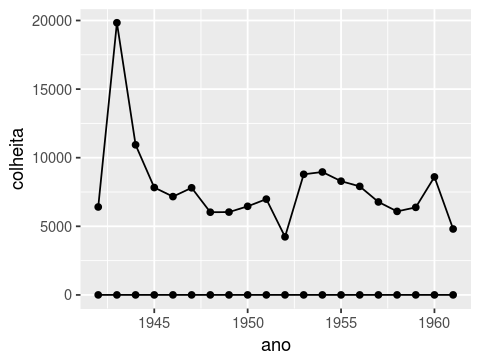

In [93]:
ggplot(df) + 
  geom_point(aes(x = ano, y = colheita)) + geom_line(aes(x = ano, y = colheita)) +
  geom_point(aes(x = ano, y = preco)) + geom_line(aes(x = ano, y = preco))

In [139]:
p1 <- ggplot(df, aes(ano, colheita)) + geom_point(colour = "#68382C", size = 3) +
     geom_line(colour = "#68382C", size = 1)

In [140]:
p1 <- p1 +  
theme(panel.grid.minor = element_blank(), 
panel.grid.major = element_line(color = "gray50", size = 0.5),
panel.grid.major.x = element_blank())

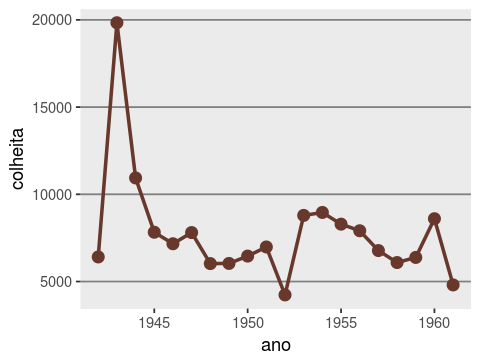

In [141]:
p1

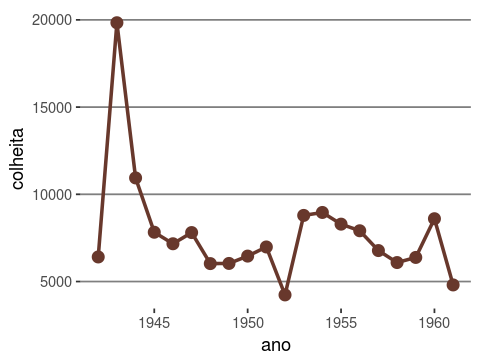

In [142]:
p1 <- p1 + theme(panel.background = element_blank())
p1

List of 1
 $ plot.title:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : chr "#68382C"
  ..$ size         : num 14
  ..$ hjust        : num -0.16
  ..$ vjust        : num 2.12
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

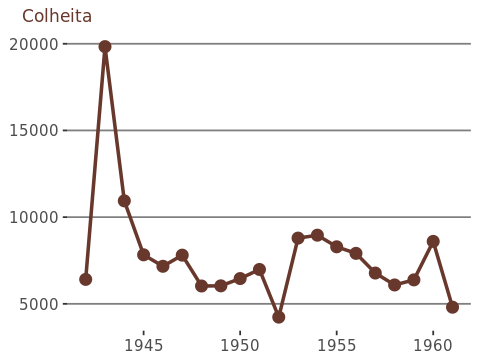

In [184]:
p1 <- p1 + ggtitle("Colheita") + labs(x=NULL, y= NULL)
theme(plot.title = element_text(hjust = -0.16, vjust=2.12, colour="#68382C", size = 14))
p1

In [133]:
font_import() 
fonts() # view available fonts
loadfonts()

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/ ...
Extracting .afm files from .ttf files...
/usr/share/fonts/truetype/abyssinica/AbyssinicaSIL-R.ttf => /home/cloves/R/x86_64-pc-linux-gnu-library/3.4/extrafontdb/metrics/AbyssinicaSIL-R
/usr/share/fonts/truetype/ancient-scripts/Symbola_hint.ttfWarning message:
“execução do comando ''/home/cloves/R/x86_64-pc-linux-gnu-library/3.4/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/ancient-scripts/Symbola_hint.ttf' '/tmp/RtmpU5Tbsb/fonts/Symbola_hint' 2>&1' teve status 139” : No FontName. Skipping.
/usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf => /home/cloves/R/x86_64-pc-linux-gnu-library/3.4/extrafontdb/metrics/DejaVuSans-BoldOblique
/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf => /home/cloves/R/x86_64-pc-linux-gnu-library/3.4/extrafontdb/metrics/DejaVuSans-Bold
/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-BoldOblique.ttf => /home/cloves/R/x86_64-pc-linux-gnu-library/3.4/extrafontdb/metrics/DejaVuSansCondens

[1] "Padauk"                 "Padauk Book"            "Abyssinica SIL"        
 [4] "DejaVu Sans"            "DejaVu Sans Condensed"  "DejaVu Sans Light"     
 [7] "DejaVu Sans Mono"       "DejaVu Serif"           "DejaVu Serif Condensed"
[10] "FreeMono"               "FreeSans"               "FreeSerif"             
[13] "Garuda"                 "KacstArt"               "KacstBook"             
[16] "KacstDecorative"        "KacstDigital"           "KacstFarsi"            
[19] "KacstLetter"            "KacstNaskh"             "KacstOffice"           
[22] "KacstOne"               "KacstPen"               "KacstPoster"           
[25] "KacstQurn"              "KacstScreen"            "KacstTitle"            
[28] "KacstTitleL"            "Khmer OS"               "Khmer OS System"       
[31] "Kinnari"                "Laksaman"               "Lato Black"            
[34] "Lato"                   "Lato Hairline"          "Lato Heavy"            
[37] "Lato Light"             "Lato Medium"            "Lato Semibold"         
[40] "Lato Thin"              "Liberation Mono"        "Liberation Sans"       
[43] "Liberation Sans Narrow" "Liberation Serif"       "LKLUG"                 
[46] "Lohit Punjabi"          "Loma"                   "mry_KacstQurn"         
[49] "NanumBarunGothic"       "NanumGothic"            "NanumMyeongjo"         
[52] "Norasi"                 "OpenSymbol"             "Phetsarath OT"         
[55] "Purisa"                 "Saab"                   "Sawasdee"              
[58] "TakaoPGothic"           "Tibetan Machine Uni"    "TlwgMono"              
[61] "TlwgTypewriter"         "Tlwg Typist"            "Tlwg Typo"             
[64] "Ubuntu"                 "Ubuntu Condensed"       "Ubuntu Light"          
[67] "Ubuntu Mono"            "Umpush"                 "Waree"

Registering font with R using pdfFonts(): Padauk
Registering font with R using pdfFonts(): Padauk Book
Registering font with R using pdfFonts(): Abyssinica SIL
Registering font with R using pdfFonts(): DejaVu Sans
Registering font with R using pdfFonts(): DejaVu Sans Condensed
Registering font with R using pdfFonts(): DejaVu Sans Light
Registering font with R using pdfFonts(): DejaVu Sans Mono
Registering font with R using pdfFonts(): DejaVu Serif
Registering font with R using pdfFonts(): DejaVu Serif Condensed
Registering font with R using pdfFonts(): FreeMono
Registering font with R using pdfFonts(): FreeSans
Registering font with R using pdfFonts(): FreeSerif
Registering font with R using pdfFonts(): Garuda
Registering font with R using pdfFonts(): KacstArt
Registering font with R using pdfFonts(): KacstBook
Registering font with R using pdfFonts(): KacstDecorative
Registering font with R using pdfFonts(): KacstDigital
Registering font with R using pdfFonts(): KacstFarsi
Registering

In [185]:
p1 <- p1 + theme(text = element_text(family="ITCOfficinaSans LT Book"),
plot.title = element_text(hjust = -0.135, vjust=2.12, colour="#68382C", size = 10, family = "OfficinaSanITCMedium"))

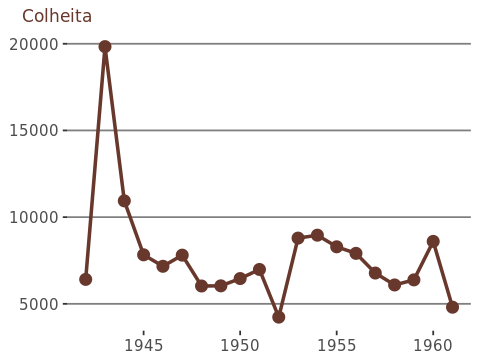

In [186]:
p1

In [206]:
p2 <- ggplot(df, aes(ano, preco)) + 
geom_point(colour = "#00A4E6", size = 3) +
geom_line(colour = "#00A4E6", size = 1) +  
ggtitle("Preço\n") +
labs(x=NULL,y=NULL) +
theme(
panel.background = element_blank(),
panel.grid.minor = element_blank(), 
panel.grid.major = element_blank(),
text = element_text(family="ITCOfficinaSans LT Book"),
axis.text.y = element_text(colour="#00A4E6", size=14),
axis.text.x = element_text(size=10),
axis.ticks.length = unit(.25, "cm"),
axis.ticks.y = element_blank(),
plot.title = element_text(hjust = 0.6, vjust=2.12, colour = "#00a4e6", size = 10, family = "OfficinaSanITCMedium"))

In [207]:
# make gtable objects from ggplot objects
# gtable object shows how grobs are put together to form a ggplot
g1 <- ggplot_gtable(ggplot_build(p1))
g2 <- ggplot_gtable(ggplot_build(p2))

# get the location of the panel of p1 
# so that the panel of p2 is positioned correctly on top of it
pp <- c(subset(g1$layout, name == "panel", se = t:r))

# superimpose p2 (the panel) on p1
g <- gtable_add_grob(g1, g2$grobs[[which(g2$layout$name == "panel")]], pp$t, 
pp$l, pp$b, pp$l)

# extract the y-axis of p2
ia <- which(g2$layout$name == "axis-l")
ga <- g2$grobs[[ia]]
ax <- ga$children[[2]]

# flip it horizontally
ax$widths <- rev(ax$widths)
ax$grobs <- rev(ax$grobs)

# add the flipped y-axis to the right
g <- gtable_add_cols(g, g2$widths[g2$layout[ia, ]$l], length(g$widths) - 1)
g <- gtable_add_grob(g, ax, pp$t, length(g$widths) - 1, pp$b)

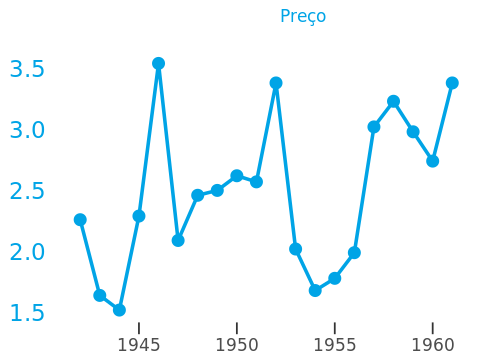

In [208]:
p2

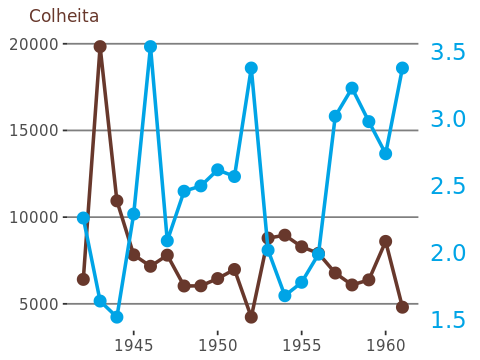

In [209]:
grid.draw(g)

In [201]:
# change text content
g$grobs[[8]]$children$GRID.text.1767$label <- c("Absoluto\n", "Proporção\n")

# change color
g$grobs[[8]]$children$GRID.text.1767$gp$col <- c("#68382C","#00A4E6")

# change x-coordinate
g$grobs[[8]]$children$GRID.text.1767$x <- unit(c(-0.155, 0.1), "npc")

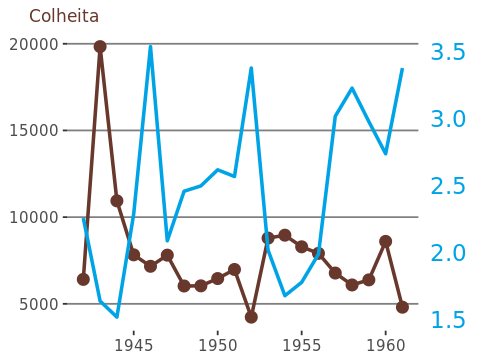

In [202]:
grid.draw(g)

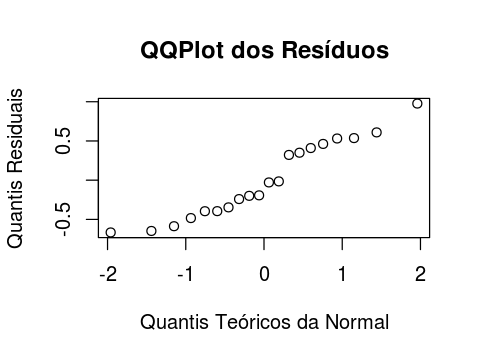

In [210]:
qqnorm(residuos_colheita, xlab='Quantis Teóricos da Normal', 
      ylab = 'Quantis Residuais', main='QQPlot dos Resíduos')

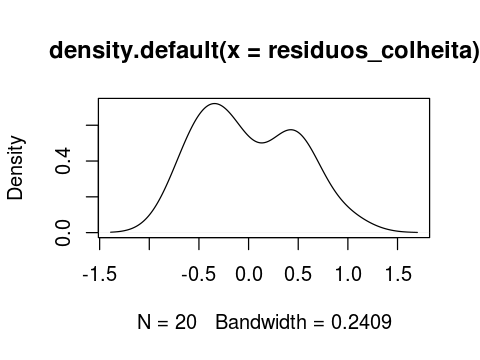

In [211]:
plot(density(residuos_colheita))